In [1]:
# Enable code formatting using external plugin: nb_black.
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Sklearn: K-Nearest Neighbor (KNN)

# [1] Setup

#### Import and configure required libraries

In [2]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

# Data modeling libraries
import sklearn
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.model_selection import KFold
from sklearn.neighbors import LocalOutlierFactor

# General imports
import math

# Library versions used in below EDA.
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Sklearn version:", sklearn.__version__)

# Configure NumPy.
# Set `Line width` to Maximum 130 characters in the output, post which it will continue in next line.
np.set_printoptions(linewidth=130)

# Configure Pandas.
# Set display width to maximum 130 characters in the output, post which it will continue in next line.
pd.options.display.width = 130

# Configure Seaborn.
sns.set_style("whitegrid")  # Set white background with grid.
sns.set_palette("deep")  # Set color palette.
sns.set_context("paper", font_scale=1.5)  # Set font to scale 1.5 more than normal.

NumPy version: 1.21.5
Pandas version: 1.4.2
Matplotlib version: 3.5.1
Seaborn version: 0.11.2
Sklearn version: 1.0.2


<IPython.core.display.Javascript object>

### Load data-points from a `.csv` file

In [3]:
train_df = pd.read_csv("./Input/train.csv")
train_df.head()

,f1,f2,cl
0,5.0,11,1
1,10.0,10,2
2,1.0,8,1
3,2.0,10,2
4,6.0,10,1


<IPython.core.display.Javascript object>

In [4]:
train_df.shape

(82, 3)

<IPython.core.display.Javascript object>

Convert class-label column `cl` into `category` data type.

In [5]:
train_df["cl"] = train_df["cl"].astype("category")
train_df["cl"].dtype

CategoricalDtype(categories=[1, 2], ordered=False)

<IPython.core.display.Javascript object>

### Plot data-points

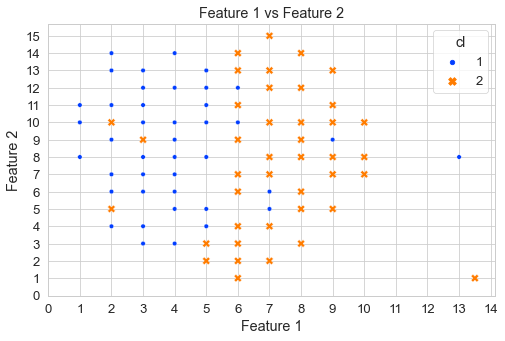

<IPython.core.display.Javascript object>

In [6]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    x="f1",
    y="f2",
    hue="cl",
    data=train_df,
    palette="bright",
    style="cl",
    markers=["o", "X"],
    size="cl",
    sizes=(60, 20),
)
plt.title("Feature 1 vs Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xticks(ticks=range(0, 15, 1))
plt.yticks(ticks=range(0, 16, 1))

plt.savefig("./Output/train-data-points.png")
plt.show()

In [7]:
test_df = pd.read_csv("./Input/test.csv")
test_df.head()

,f1,f2,cl
0,5.0,6.0,1
1,4.5,5.3,1
2,5.0,9.0,1
3,3.3,11.2,1
4,2.5,9.0,1


<IPython.core.display.Javascript object>

#### Plot Train and Test data-points

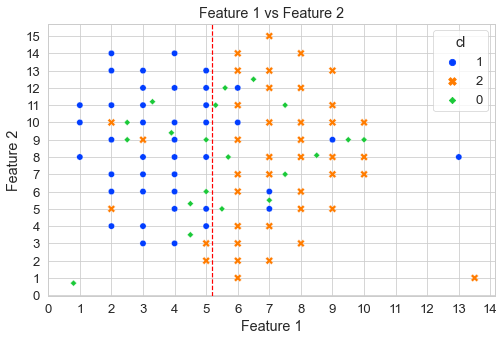

<IPython.core.display.Javascript object>

In [8]:
test_df_temp = test_df.copy()
test_df_temp["cl"] = 0

plt.figure(figsize=(8, 5))

sns.scatterplot(
    x="f1",
    y="f2",
    hue="cl",
    data=pd.concat([train_df, test_df_temp]),
    palette="bright",
    hue_order=[1, 2, 0],
    style="cl",
    markers=["D", "o", "X"],
    size="cl",
    sizes=(20, 60),
)
plt.title("Feature 1 vs Feature 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xticks(ticks=range(0, 15, 1))
plt.yticks(ticks=range(0, 16, 1))
plt.axvline(5.2, linestyle="--", color="r")

plt.savefig("./Output/train-n-test-data-points.png")
plt.show()

1. Every green point on **left side** of the red line belongs to class **`1` - Blue**.
2. Every green point (except `(5.7, 8)`) on **right side** of the red line belongs to class **`2` - Orange**.
3. Green data-point **`(5.7, 8)`** on right of the red line belongs to class **`1` - Blue**.

# [2] Try default `K` value `5` 

In [9]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric="euclidean")

X_train = train_df[["f1", "f2"]]
y_train = train_df["cl"]

# Fit Model
classifier.fit(X_train, y_train)

X_test = test_df[["f1", "f2"]]
y_test = test_df["cl"]

# Predict the test set results
y_pred = classifier.predict(X_test)

<IPython.core.display.Javascript object>

#### Calculate accuracy

In [10]:
table = PrettyTable(["Data-Point", "Actual Class", "Predicted Class", "Failed"])

pcl_count = 0
for index, yp in enumerate(y_pred):
    xq = X_test.iloc[index].values
    yq = y_test.iloc[index]

    sym = "X"
    if yp == yq:
        pcl_count += 1
        sym = ""

    table.add_row([xq, yq, yp, sym])

print(table)
print(f"Accuracy: {pcl_count / len(y_test) * 100}%")

+-------------+--------------+-----------------+--------+
|  Data-Point | Actual Class | Predicted Class | Failed |
+-------------+--------------+-----------------+--------+
|   [5. 6.]   |      1       |        1        |        |
|  [4.5 5.3]  |      1       |        1        |        |
|   [5. 9.]   |      1       |        1        |        |
| [ 3.3 11.2] |      1       |        1        |        |
|  [2.5 9. ]  |      1       |        1        |        |
| [ 2.5 10. ] |      1       |        1        |        |
|  [5.7 8. ]  |      1       |        2        |   X    |
|  [4.5 3.5]  |      1       |        1        |        |
|  [3.9 9.4]  |      1       |        1        |        |
|  [0.8 0.7]  |      1       |        1        |        |
| [ 7.5 11. ] |      2       |        2        |        |
|  [10.  9.]  |      2       |        2        |        |
|  [9.5 9. ]  |      2       |        2        |        |
|  [8.5 8.1]  |      2       |        2        |        |
|  [5.5 5. ]  

<IPython.core.display.Javascript object>

All Failures are near the border where data-points from both the classes meet.

# [3] Train Error

In [11]:
def KNN(k, X_train, y_train, X_test, y_test):
    # Define the model: Init K-NN.
    classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric="euclidean")

    # Fit Model.
    classifier.fit(X_train, y_train)

    # Predict the test set results.
    y_pred = classifier.predict(X_test)

    n2 = len(X_test)
    # Correct prediction count.
    pcl_count = 0
    for index, yq in enumerate(y_pred):
        if yq == y_test[index]:
            pcl_count += 1

    return pcl_count / n2

<IPython.core.display.Javascript object>

In [12]:
X_train = train_df[["f1", "f2"]]
y_train = train_df["cl"]

n1 = len(X_train)
train_errs = []
for k in range(1, n1 + 1):
    acc = KNN(k, X_train, y_train, X_train, y_train)
    train_errs.append(1 - acc)

<IPython.core.display.Javascript object>

#### Plot Train error

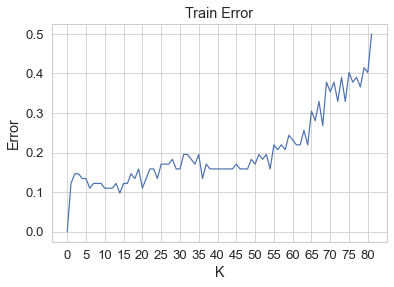

<IPython.core.display.Javascript object>

In [13]:
sns.lineplot(data=train_errs)
plt.title("Train Error")
plt.xlabel("K")
plt.ylabel("Error")
plt.xticks(ticks=range(0, 85, 5))

plt.show()

# [4] K-Fold Cross validation

In [14]:
X = train_df[["f1", "f2"]].values
y = train_df["cl"].values
splits = 10

kf = KFold(n_splits=splits)

n = math.floor((1 - 1 / splits) * len(X))

test_errs = []
for k in range(1, n + 1):
    accs = []
    for train_idx, cross_idx in kf.split(X):
        X_train, X_cross = X[train_idx], X[cross_idx]
        y_train, y_cross = y[train_idx], y[cross_idx]

        acc = KNN(k, X_train, y_train, X_cross, y_cross)
        accs.append(acc)
    test_errs.append(1 - np.mean(accs))

<IPython.core.display.Javascript object>

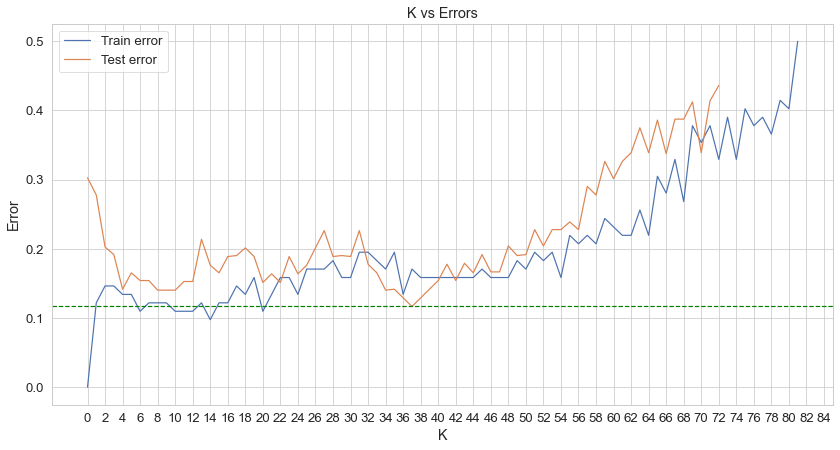

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(14, 7))

sns.lineplot(data=train_errs, label="Train error")
sns.lineplot(data=test_errs, label="Test error")
plt.title("K vs Errors")
plt.xlabel("K")
plt.ylabel("Error")
plt.xticks(ticks=range(0, 85, 2))
plt.axhline(min(test_errs), linestyle="--", color="g")

plt.show()

# [5] Local outlier factor (LOF)

In [16]:
def top_K_outliers(items, K=5):
    max_lof_val = 0
    max_lof_idx = 0
    lofs = [{"idx": idx, "val": round(item, 4)} for idx, item in enumerate(items)]

    return sorted(lofs, key=lambda lof: lof["val"])[:K]

<IPython.core.display.Javascript object>

In [17]:
X = train_df[["f1", "f2"]].values

clf = LocalOutlierFactor(n_neighbors=5)
clf.fit_predict(X)

nof = clf.negative_outlier_factor_
outliers = top_K_outliers(nof)
outliers

[{'idx': 35, 'val': -3.5782},
 {'idx': 12, 'val': -2.0561},
 {'idx': 8, 'val': -1.2297},
 {'idx': 49, 'val': -1.2288},
 {'idx': 5, 'val': -1.2216}]

<IPython.core.display.Javascript object>

#### Top five Outliers

In [18]:
fltr = [loa["idx"] for loa in outliers]  # Filter
train_df.loc[fltr]  # Apply filter

,f1,f2,cl
35,13.5,1,2
12,13.0,8,1
8,2.0,14,1
49,7.0,15,2
5,8.0,3,2


<IPython.core.display.Javascript object>

# [6] Performance Measurement

## 1. Accuracy

## 2. Confusion Matrix